In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
emplsal=pd.read_csv('empl_sal.csv')
emplsal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#--->>>> Doing EDA

In [4]:
emplsal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
emplsal.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df=pd.DataFrame(data=emplsal)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df.shape

(30, 2)

In [8]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

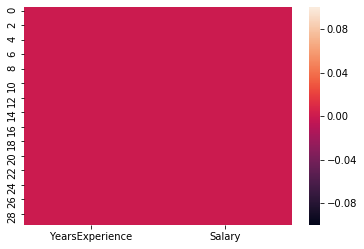

In [11]:
sns.heatmap(df.isnull())

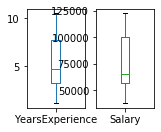

In [12]:
df.plot(kind='box',subplots=True,layout=(2,5))
plt.show()

In [13]:
df[2:6]

,YearsExperience,Salary
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [14]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

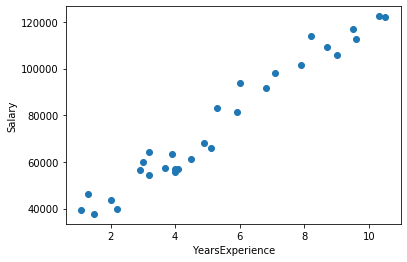

In [30]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x,y)

In [31]:
def dataplot():
    plt.xlabel("YearsExperience")
    plt.ylabel("Salary")
    plt.scatter(x,y)

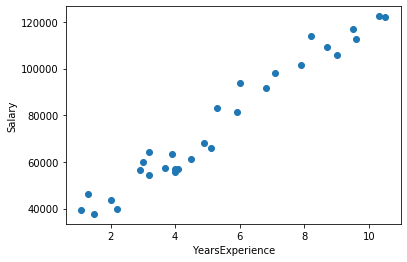

In [32]:
dataplot()

In [33]:
# splitting the data into training & testing

In [15]:
def linreg():
    lm=LinearRegression()
    lm.fit(x,y)
    print('score=',lm.score(x,y))
    print('coefficient=',lm.coef_)
    print('Intercept=',lm.intercept_)

In [16]:
linreg()

score= 0.9569566641435084
coefficient= [9449.96232146]
Intercept= 25792.200198668717


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [18]:
x_train.shape

(21, 1)

In [19]:
y_train.shape

(21,)

In [20]:
x_test.shape

(9, 1)

In [21]:
y_test.shape

(9,)

In [22]:
lm=LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm.coef_

array([9360.26128619])

In [25]:
lm.intercept_

26777.39134119764

In [26]:
lm.score(x_train,y_train)

0.9423777652193379

In [27]:
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]
actual result [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.]


In [28]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9740993407213511


In [29]:
print("error:")
print(mean_squared_error(y_test,pred))

error:
23370078.800832972
